In [28]:
#Datu ielāde
import pandas as pd
df = pd.read_csv("Mobile.csv")

df.head()


,Battery_power_mAh,Bluetooh,Speed_of_microprocessor,Dual_sim,Front_camera,4G,Internal_memeory_gb,Mobile_depth,Mobile_weight,Cores_of_processor,...,px_height,Pixel_width,Ram_mb,Screen_height,Screen_weight,talk_time,3G,touch_screen,wifi,price_range
0,842 mAh,No,2.2,No,1 pixels,No,7 gb,0.6 cm,188 g,2,...,20 ppcm,756 ppcm,2549 mb,9 cm,7 cm,19,No,No,Yes,Medium cost
1,1021 mAh,Yes,0.5,Yes,0 pixels,Yes,53 gb,0.7 cm,136 g,3,...,905 ppcm,1988 ppcm,2631 mb,17 cm,3 cm,7,Yes,Yes,No,High cost
2,563 mAh,Yes,0.5,Yes,2 pixels,Yes,41 gb,0.9 cm,145 g,5,...,1263 ppcm,1716 ppcm,2603 mb,11 cm,2 cm,9,Yes,Yes,No,High cost
3,615 mAh,Yes,2.5,No,0 pixels,No,10 gb,0.8 cm,131 g,6,...,1216 ppcm,1786 ppcm,2769 mb,16 cm,8 cm,11,Yes,No,No,High cost
4,1821 mAh,Yes,1.2,No,13 pixels,Yes,44 gb,0.6 cm,141 g,2,...,1208 ppcm,1212 ppcm,1411 mb,8 cm,2 cm,15,Yes,Yes,No,Medium cost


In [ ]:

import re
import pandas as pd

yes_no_cols = [col for col in df.columns if df[col].astype(str).str.lower().isin(["yes","no"]).any()]

def safe_to_numeric(series):
    return pd.to_numeric(
        series.astype(str).str.extract(r"([-+]?[0-9]*\.?[0-9]+)") [0],
        errors="coerce"
    )


cols_with_numbers = [
    col for col in df.columns
    if df[col].astype(str).str.contains(r"\d").any() and col not in yes_no_cols
]

for col in cols_with_numbers:
    df[col] = safe_to_numeric(df[col])
    print(f"Converted to numeric: {col}")

df.head()



Converted to numeric: Battery_power_mAh
Converted to numeric: Speed_of_microprocessor
Converted to numeric: Front_camera
Converted to numeric: Internal_memeory_gb
Converted to numeric: Mobile_depth
Converted to numeric: Mobile_weight
Converted to numeric: Cores_of_processor
Converted to numeric: Primary_camera
Converted to numeric: px_height
Converted to numeric: Pixel_width
Converted to numeric: Ram_mb
Converted to numeric: Screen_height
Converted to numeric: Screen_weight
Converted to numeric: talk_time


,Battery_power_mAh,Bluetooh,Speed_of_microprocessor,Dual_sim,Front_camera,4G,Internal_memeory_gb,Mobile_depth,Mobile_weight,Cores_of_processor,...,px_height,Pixel_width,Ram_mb,Screen_height,Screen_weight,talk_time,3G,touch_screen,wifi,price_range
0,842,No,2.2,No,1,No,7,0.6,188,2,...,20,756,2549,9,7,19,No,No,Yes,Medium cost
1,1021,Yes,0.5,Yes,0,Yes,53,0.7,136,3,...,905,1988,2631,17,3,7,Yes,Yes,No,High cost
2,563,Yes,0.5,Yes,2,Yes,41,0.9,145,5,...,1263,1716,2603,11,2,9,Yes,Yes,No,High cost
3,615,Yes,2.5,No,0,No,10,0.8,131,6,...,1216,1786,2769,16,8,11,Yes,No,No,High cost
4,1821,Yes,1.2,No,13,Yes,44,0.6,141,2,...,1208,1212,1411,8,2,15,Yes,Yes,No,Medium cost


In [ ]:

#Sadalīšana pēc X un y. mērķa kolonnas noteikšana
target_col = "price_range"

X = df.drop(columns=[target_col])
y = df[target_col]

num_cols = X.select_dtypes(include=["number"]).columns
cat_cols = X.select_dtypes(exclude=["number"]).columns

print("Numeriskās kolonnas:", list(num_cols))
print("Kategoriskās kolonnas:", list(cat_cols))


Numeriskās kolonnas: ['Battery_power_mAh', 'Speed_of_microprocessor', 'Front_camera', 'Internal_memeory_gb', 'Mobile_depth', 'Mobile_weight', 'Cores_of_processor', 'Primary_camera', 'px_height', 'Pixel_width', 'Ram_mb', 'Screen_height', 'Screen_weight', 'talk_time']
Kategoriskās kolonnas: ['Bluetooh', 'Dual_sim', '4G', '3G', 'touch_screen', 'wifi']


In [31]:
categorical_cols = df.select_dtypes(exclude='number')

for col in categorical_cols:
    print(f"\nKolonna: {col}")
    print(df[col].value_counts(dropna=False))


Kolonna: Bluetooh
Bluetooh
No     1010
Yes     990
Name: count, dtype: int64

Kolonna: Dual_sim
Dual_sim
Yes    1019
No      981
Name: count, dtype: int64

Kolonna: 4G
4G
Yes    1043
No      957
Name: count, dtype: int64

Kolonna: 3G
3G
Yes    1523
No      477
Name: count, dtype: int64

Kolonna: touch_screen
touch_screen
Yes    1006
No      994
Name: count, dtype: int64

Kolonna: wifi
wifi
Yes    1014
No      986
Name: count, dtype: int64

Kolonna: price_range
price_range
Medium cost       500
High cost         500
Very High cost    500
Low cost          500
Name: count, dtype: int64


In [32]:
from scipy.stats import f_oneway

anova_results = {}
numeric_cols = df.select_dtypes(include='number')
for col in numeric_cols.columns:
    groups = [group[col].values for name, group in df.groupby("price_range")]
    F, p = f_oneway(*groups)
    anova_results[col] = {"F-stat": F, "p-value": p}

pd.DataFrame(anova_results).T.sort_values("p-value")


,F-stat,p-value
Ram_mb,3520.110824,0.000000e+00
Battery_power_mAh,31.598158,5.948688e-20
Pixel_width,22.620882,2.116911e-14
px_height,19.484842,1.886085e-12
Mobile_weight,3.594318,1.311739e-02
Internal_memeory_gb,2.922996,3.277694e-02
Cores_of_processor,2.625415,4.893585e-02
Screen_height,2.225984,8.324991e-02
Screen_weight,1.671000,1.712146e-01
talk_time,1.628811,1.806686e-01


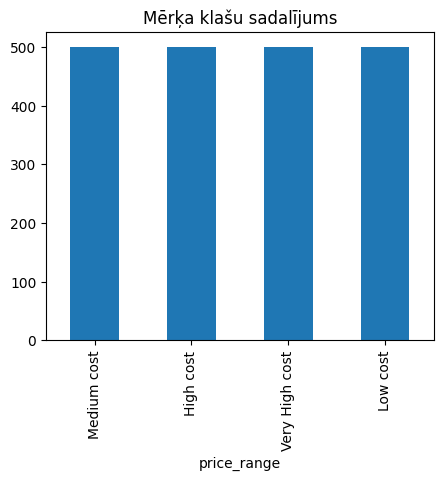

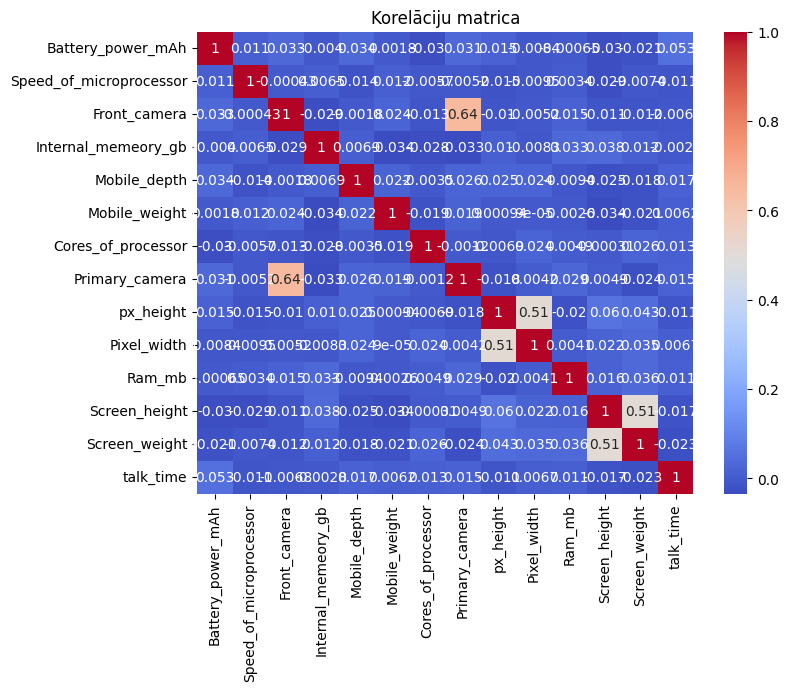

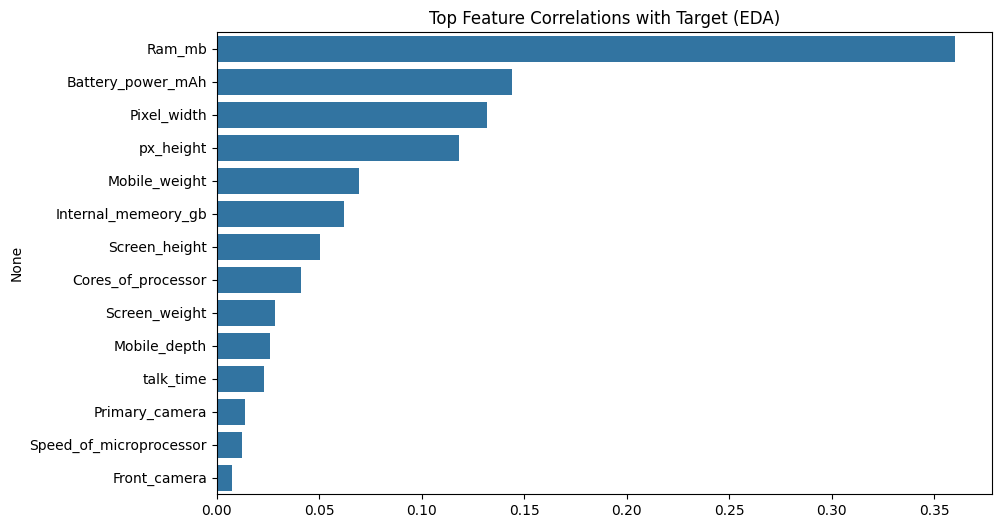

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
df[target_col].value_counts().plot(kind="bar")
plt.title("Mērķa klašu sadalījums")
plt.show()

if len(num_cols) > 1:
    plt.figure(figsize=(8,6))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
    plt.title("Korelāciju matrica")
    plt.show()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = df.copy()
df_encoded[target_col] = le.fit_transform(df_encoded[target_col])

correlations = df_encoded[list(num_cols) + [target_col]].corr()[target_col].drop(target_col).abs().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title("Top Feature Correlations with Target (EDA)")
plt.show()

In [34]:

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

models = {
    "Dummy": {
        "model": DummyClassifier(strategy="most_frequent"),
        "params": {}
    },
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000, class_weight="balanced"),
        "params": {"model__C": [0.1, 1, 3], "model__penalty": ["l2"]}
    },
    "RandomForest": {
        "model": RandomForestClassifier(class_weight="balanced", random_state=42),
        "params": {"model__n_estimators": [200, 400],
                   "model__max_depth": [None, 10, 20]}
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {"model__n_estimators": [100, 200],
                   "model__learning_rate": [0.05, 0.1]}
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {"model__n_neighbors": [3, 5, 7]}
    }
}

classes = np.unique(y)
is_binary = (len(classes) == 2)

if is_binary:
    cv_scoring = "roc_auc"
else:
    cv_scoring = "f1_macro"

results = []
best_model = None
best_score = -np.inf

if is_binary:
    pos_label = classes[0]  

for name, cfg in models.items():
    print(f"Modelis: {name}")
    pipe = Pipeline([("prep", preprocessor), ("model", cfg["model"])])

    # GridSearch
    if cfg["params"]:
        grid = GridSearchCV(pipe, cfg["params"], scoring=cv_scoring, cv=5, n_jobs=-1)
        grid.fit(X_train, y_train)
        best_est = grid.best_estimator_
        best_cv = grid.best_score_
    else:
        pipe.fit(X_train, y_train)
        best_est = pipe

        if is_binary and hasattr(best_est, "predict_proba"):
            best_cv = roc_auc_score(y_train, best_est.predict_proba(X_train)[:, 1])
        else:

            best_cv = accuracy_score(y_train, best_est.predict(X_train))

    preds = best_est.predict(X_test)


    acc = accuracy_score(y_test, preds)

    if is_binary:
        f1 = f1_score(y_test, preds, pos_label=pos_label)
    else:

        f1 = f1_score(y_test, preds, average="macro")

    results.append({
        "model": name,
        "cv_auc_or_score": best_cv,
        "acc": acc,
        "f1": f1
    })

    if best_cv > best_score:
        best_score = best_cv
        best_model = best_est
        best_model_name = name

results_df = pd.DataFrame(results)
results_df


Modelis: Dummy
Modelis: LogisticRegression
Modelis: RandomForest
Modelis: GradientBoosting
Modelis: KNN


,model,cv_auc_or_score,acc,f1
0,Dummy,0.250000,0.250000,0.100000
1,LogisticRegression,0.965648,0.950000,0.949856
2,RandomForest,0.869159,0.856667,0.856174
3,GradientBoosting,0.892404,0.890000,0.890343
4,KNN,0.567856,0.585000,0.585573


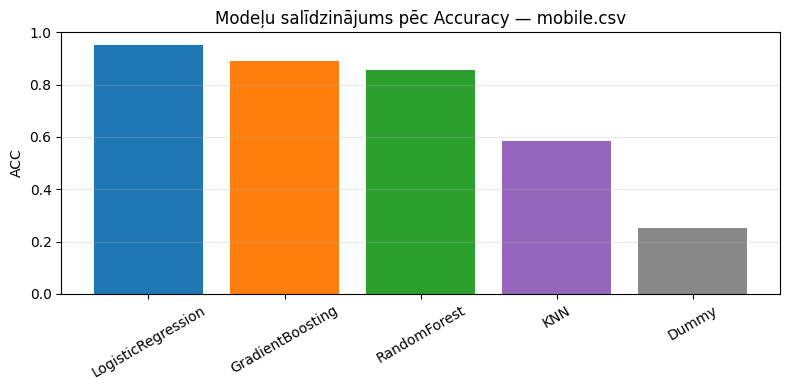

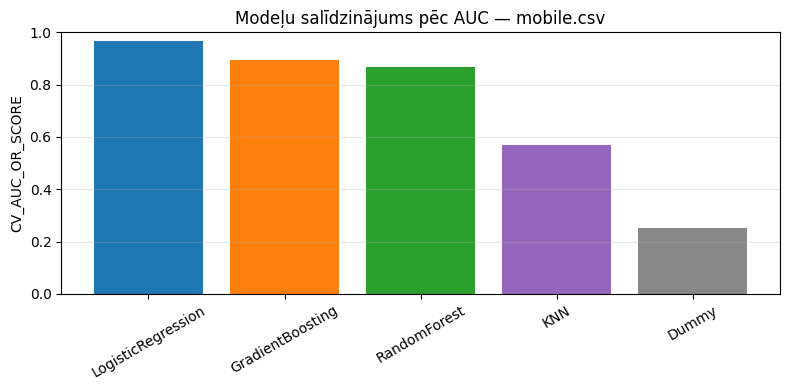

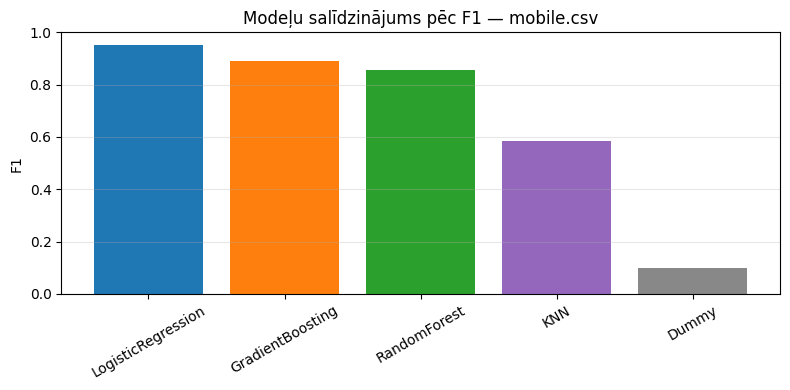

In [36]:
import matplotlib.pyplot as plt

colors = {
    "Dummy": "#888888",
    "LogisticRegression": "#1f77b4",
    "RandomForest": "#2ca02c",
    "GradientBoosting": "#ff7f0e",
    "KNN": "#9467bd"
}

def plot_metric(df, metric, title):

    df_sorted = df.sort_values(by=metric, ascending=False)

    plt.figure(figsize=(8, 4))
    plt.bar(df_sorted["model"], df_sorted[metric],
            color=[colors[m] for m in df_sorted["model"]])
    
    plt.title(title)
    plt.ylabel(metric.upper())
    plt.ylim(0, 1)
    plt.xticks(rotation=30)
    plt.grid(axis="y", alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_metric(results_df, "acc", "Modeļu salīdzinājums pēc Accuracy — mobile.csv")
plot_metric(results_df, "cv_auc_or_score", "Modeļu salīdzinājums pēc AUC — mobile.csv")
plot_metric(results_df, "f1",  "Modeļu salīdzinājums pēc F1 — mobile.csv")


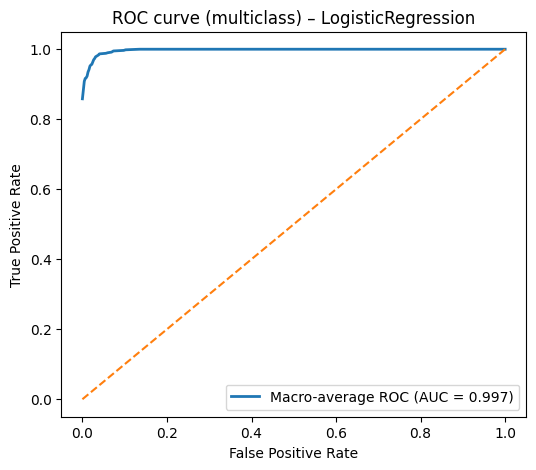

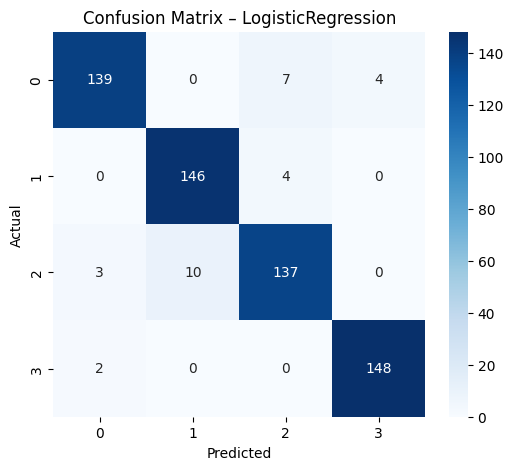

In [ ]:

from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]
y_prob = best_model.predict_proba(X_test)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

macro_auc = auc(all_fpr, mean_tpr)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(all_fpr, mean_tpr, label=f"Macro-average ROC (AUC = {macro_auc:.3f})", linewidth=2)
plt.plot([0, 1], [0, 1], "--")
plt.title(f"ROC curve (multiclass) – {best_model_name}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, best_model.predict(X_test))
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix – {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
